In [86]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


file_path = 'postfire.csv' 
df = pd.read_csv(file_path)


C:\Users\olive\AppData\Local\Temp\ipykernel_29520\3851151225.py:7: DtypeWarning: Columns (12,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


C:\Users\olive\AppData\Local\Temp\ipykernel_29520\4190069016.py:7: DtypeWarning: Columns (12,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


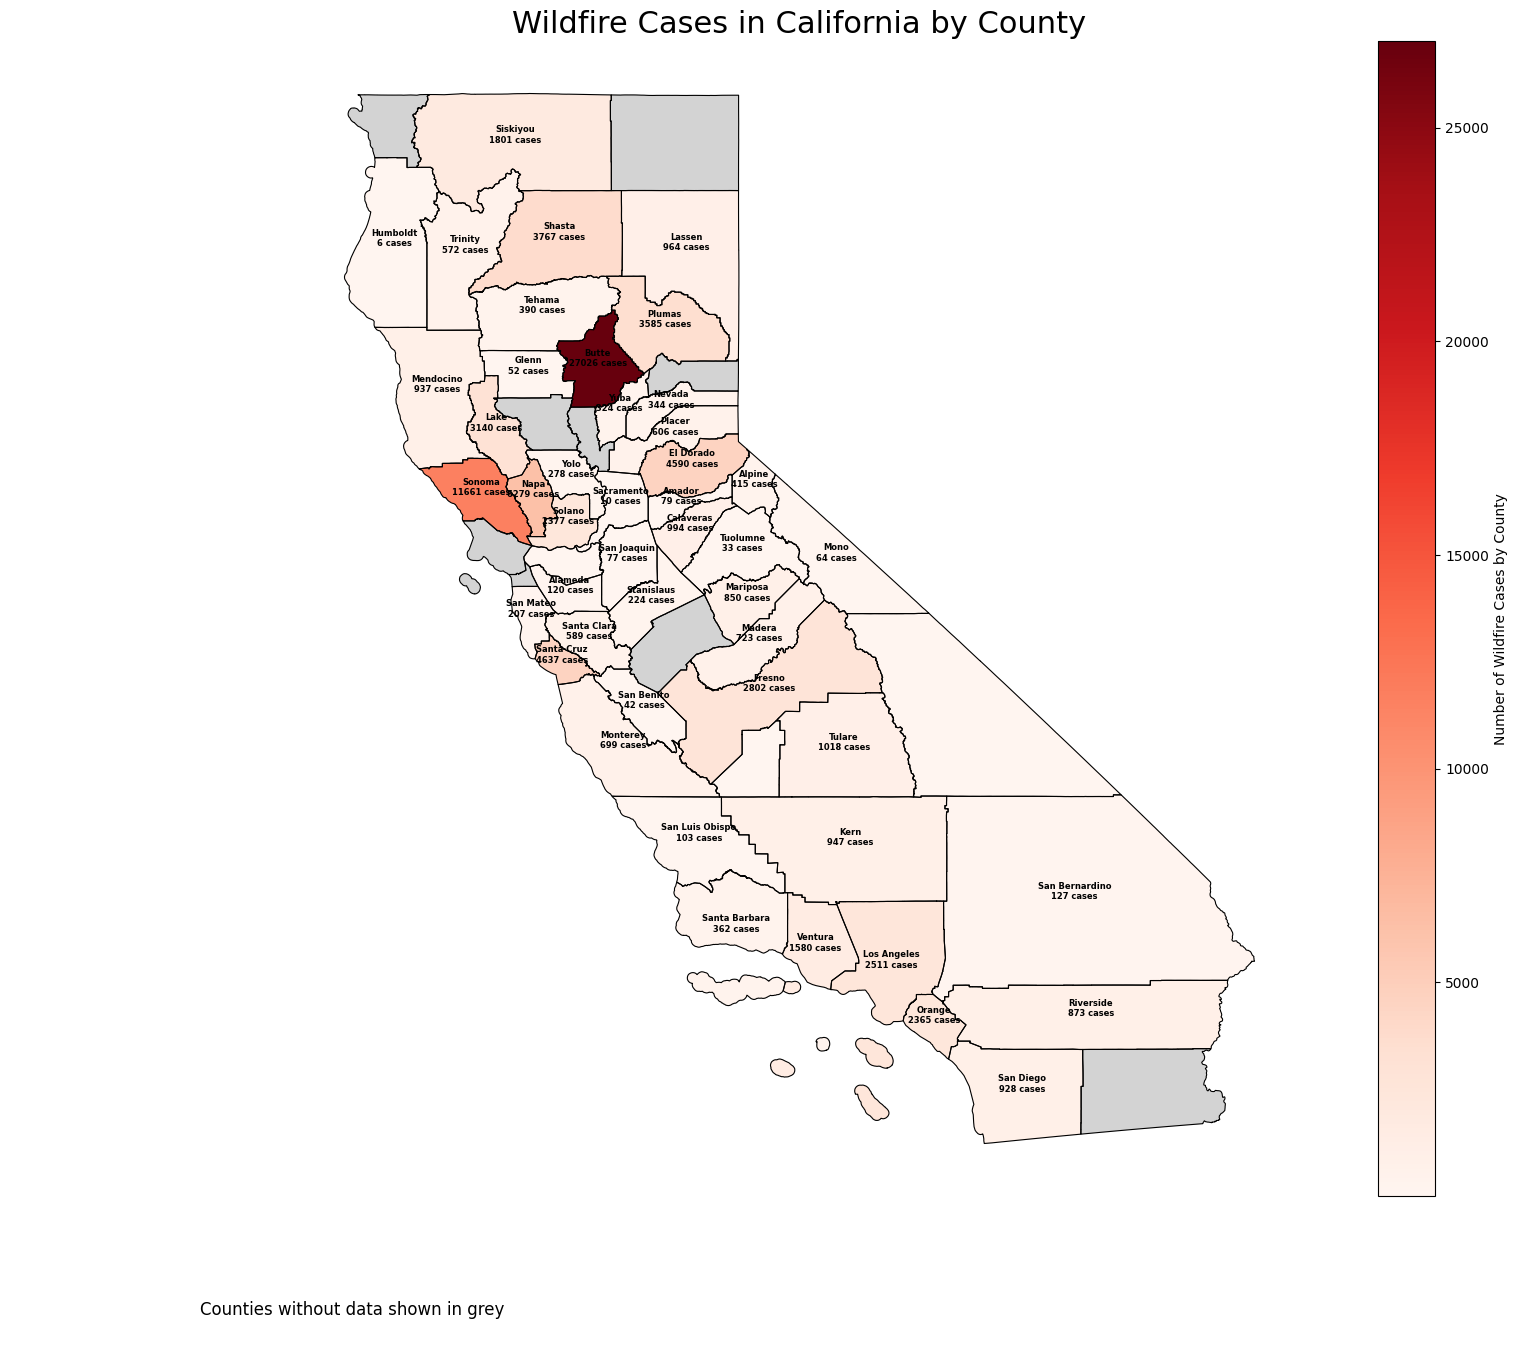

In [87]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# wildfire dataset
file_path = 'postfire.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# need to clean "*"
df.columns = df.columns.str.strip().str.replace(r'\* ', '', regex=True)

# aggregate by county
wildfire_counts = df['County'].value_counts().reset_index()  # Get case counts
wildfire_counts.columns = ['County', 'Cases']

# we want to use shapefile to visualize the data in map
shapefile_path = 'CA_Counties.shp' 
california_map = gpd.read_file(shapefile_path)
california_map['County'] = california_map['NAME']

merged_map = california_map.merge(wildfire_counts, on='County', how='left')

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged_map.boundary.plot(ax=ax, linewidth=0.8, color='black') 
merged_map.plot(
    column='Cases',
    cmap='Reds',  # Use a darker colormap for severity
    legend=True,
    legend_kwds={
        'label': "Number of Wildfire Cases by County",
        'orientation': "vertical"
    },
    ax=ax,
    missing_kwds={
        "color": "lightgrey",
        "label": "No data"
    }
)

for idx, row in merged_map.iterrows():
    if pd.notna(row['Cases']) and row['Cases'] > 5:  # Only label counties with more than 5 cases
        plt.annotate(
            text=f"{row['County']}\n{int(row['Cases'])} cases",
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            horizontalalignment='center',
            fontsize=6,  # Reduced font size
            color='black',
            weight='bold'
        )

# Title and annotations
ax.set_title('Wildfire Cases in California by County', fontsize=22)  # Enlarged title
ax.axis('off')

plt.annotate("Counties without data shown in grey", xy=(0.1, 0.02), xycoords='figure fraction', fontsize=12)

plt.show()



In [88]:
output_list = []

for idx, row in merged_map.iterrows():
    if pd.notna(row['Cases']):
        output_list.append(f"{row['County']}: {int(row['Cases'])} cases")
    else:
        output_list.append(f"{row['County']}: No data")

for item in output_list:
    print(item)

Sierra: No data
Sacramento: 10 cases
Santa Barbara: 362 cases
Calaveras: 994 cases
Ventura: 1580 cases
Los Angeles: 2511 cases
Sonoma: 11661 cases
Kings: 1 cases
San Diego: 928 cases
Placer: 606 cases
San Francisco: No data
Marin: No data
Mariposa: 850 cases
Lassen: 964 cases
Napa: 6279 cases
Shasta: 3767 cases
Monterey: 699 cases
Trinity: 572 cases
Mendocino: 937 cases
Inyo: 2 cases
Mono: 64 cases
Tuolumne: 33 cases
Solano: 2377 cases
San Bernardino: 127 cases
Contra Costa: 2 cases
Alpine: 415 cases
El Dorado: 4590 cases
Yolo: 278 cases
Yuba: 324 cases
San Benito: 42 cases
Humboldt: 6 cases
Riverside: 873 cases
Kern: 947 cases
Colusa: No data
Del Norte: No data
Modoc: No data
Fresno: 2802 cases
Madera: 723 cases
Santa Clara: 589 cases
Tehama: 390 cases
San Joaquin: 77 cases
Alameda: 120 cases
Nevada: 344 cases
Butte: 27026 cases
Merced: No data
Tulare: 1018 cases
Stanislaus: 224 cases
Orange: 2365 cases
Imperial: No data
Sutter: No data
Amador: 79 cases
Lake: 3140 cases
Plumas: 3585 c

              Date Time Site Name  Value Averaging Period  Units  \
0  4/1/2019 12:00:00 AM   Banning      8             1-hr  µg/m3   
1   4/1/2019 1:00:00 AM   Banning      8             1-hr  µg/m3   
2   4/1/2019 2:00:00 AM   Banning      8             1-hr  µg/m3   
3   4/1/2019 3:00:00 AM   Banning      7             1-hr  µg/m3   
4   4/1/2019 4:00:00 AM   Banning     11             1-hr  µg/m3   

   California State Standard  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4                        NaN   

   National Ambient Air Quality Standard by U.S. EPA  Unnamed: 7  
0                                                NaN         NaN  
1                                                NaN         NaN  
2                                                NaN         NaN  
3                                                NaN         NaN  
4                                                NaN         Na

C:\Users\olive\AppData\Local\Temp\ipykernel_29520\3413509300.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_2019['Date Time'] = pd.to_datetime(data_2019['Date Time'])


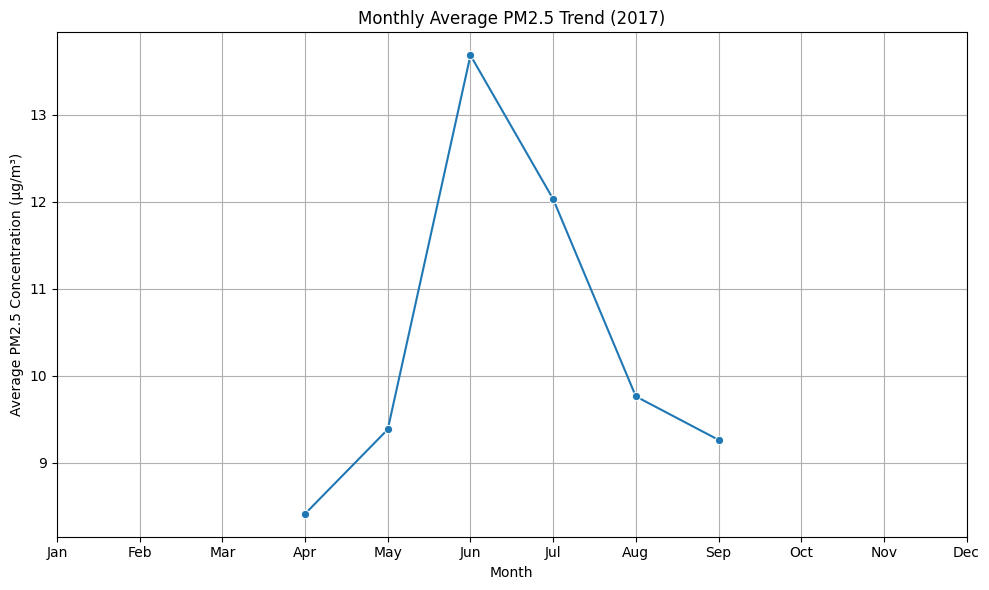

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_2019 = pd.read_csv('2019airquality.csv')
print(data_2019.head())

data_2019['Date Time'] = pd.to_datetime(data_2019['Date Time'])

columns_to_keep = ["Date Time", "Value"]
data_2019 = data_2019[columns_to_keep]

data_2019['Month'] = data_2019['Date Time'].dt.month

monthly_pm25_2017 = data_2019.groupby('Month')['Value'].mean().reset_index()
# select the month from march to september
monthly_pm25_2017 = monthly_pm25_2017[(monthly_pm25_2017['Month'] >= 3) & (monthly_pm25_2017['Month'] <= 9)]
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_pm25_2017, x="Month", y="Value", marker="o")
plt.title("Monthly Average PM2.5 Trend (2017)")
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Concentration (µg/m³)")
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\olive\AppData\Local\Temp\ipykernel_29520\2771667118.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_polluted_areas, x="PM2.5", y="CBSA_NAME", palette="Reds_r")


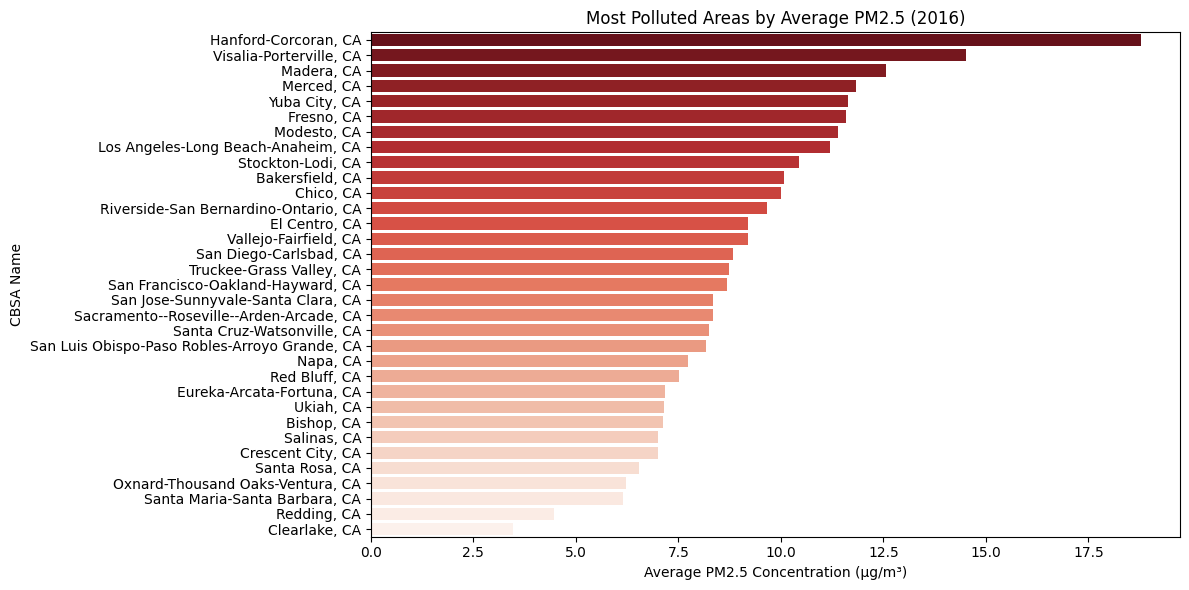

In [90]:
data = pd.read_csv('airquality.csv')
data['Date'] = pd.to_datetime(data['Date'])

columns_to_keep = [
    "Date",
    "Daily Mean PM2.5 Concentration",
    "Site Name",
    "CBSA_NAME",
    "STATE",
    "COUNTY"
]
data = data[columns_to_keep]

data.rename(columns={"Daily Mean PM2.5 Concentration": "PM2.5"}, inplace=True)

# 1. Find the most polluted areas by average PM2.5
most_polluted_areas = (
    data.groupby("CBSA_NAME")["PM2.5"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=most_polluted_areas, x="PM2.5", y="CBSA_NAME", palette="Reds_r")
plt.title("Most Polluted Areas by Average PM2.5 (2016)")
plt.xlabel("Average PM2.5 Concentration (µg/m³)")
plt.ylabel("CBSA Name")
plt.tight_layout()
plt.show()


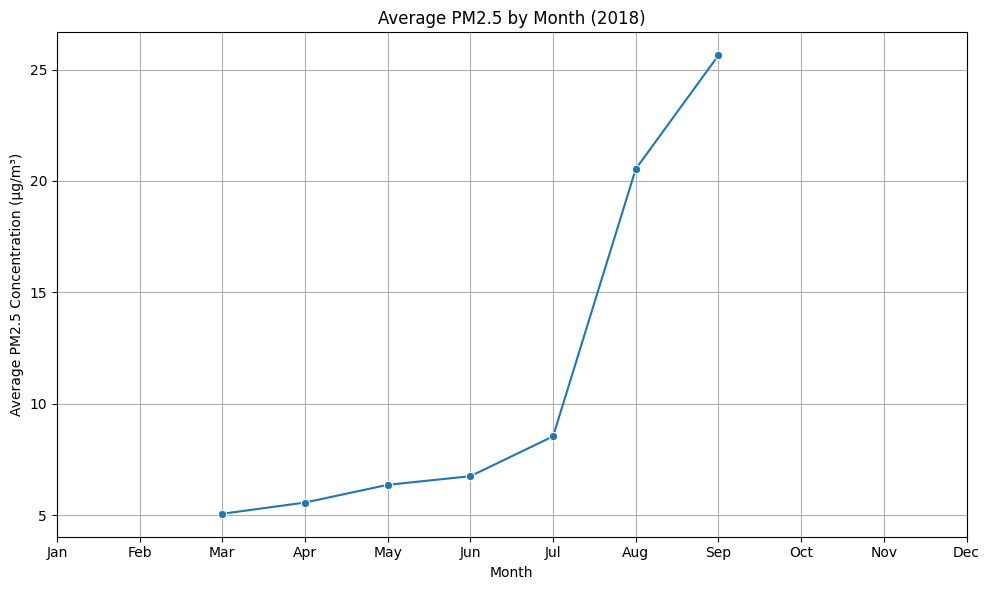

In [91]:
# the worst air quality month
data['Month'] = data['Date'].dt.month
monthly_pm25 = data.groupby('Month')['PM2.5'].mean().reset_index()
# select the month from 3to 9
monthly_pm25 = monthly_pm25[(monthly_pm25['Month'] >= 3) & (monthly_pm25['Month'] <= 9)]
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_pm25, x="Month", y="PM2.5", marker="o")
plt.title("Average PM2.5 by Month (2018)")
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Concentration (µg/m³)")
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])

plt.grid()
plt.tight_layout()
plt.show()

data.to_csv('processed_air_quality_data.csv', index=False)

  County AB617Community             DataProvider                 Site  \
0   Kern        Shafter  San Joaquin Valley APCD  Grimmway Elementary   
1   Kern        Shafter  San Joaquin Valley APCD          Shafter DMV   
2   Kern        Shafter  San Joaquin Valley APCD  Grimmway Elementary   
3   Kern        Shafter  San Joaquin Valley APCD          Shafter DMV   
4   Kern        Shafter  San Joaquin Valley APCD  Grimmway Elementary   

   Latitude  Longitude  Elevation        Instrument MonitorId  ParameterId  \
0   35.4912  -119.2871        105  Met One BAM 1022  BAM 1022        88101   
1   35.5033  -119.2725        108  Met One BAM 1022  BAM 1022        88101   
2   35.4912  -119.2871        105  Met One BAM 1022  BAM 1022        88101   
3   35.5033  -119.2725        108  Met One BAM 1022  BAM 1022        88101   
4   35.4912  -119.2871        105  Met One BAM 1022  BAM 1022        88101   

   ...       Units AdjustmentDesc  LowerLimitCheck  UpperLimitCheck  \
0  ...  ug/m3 (LC)   

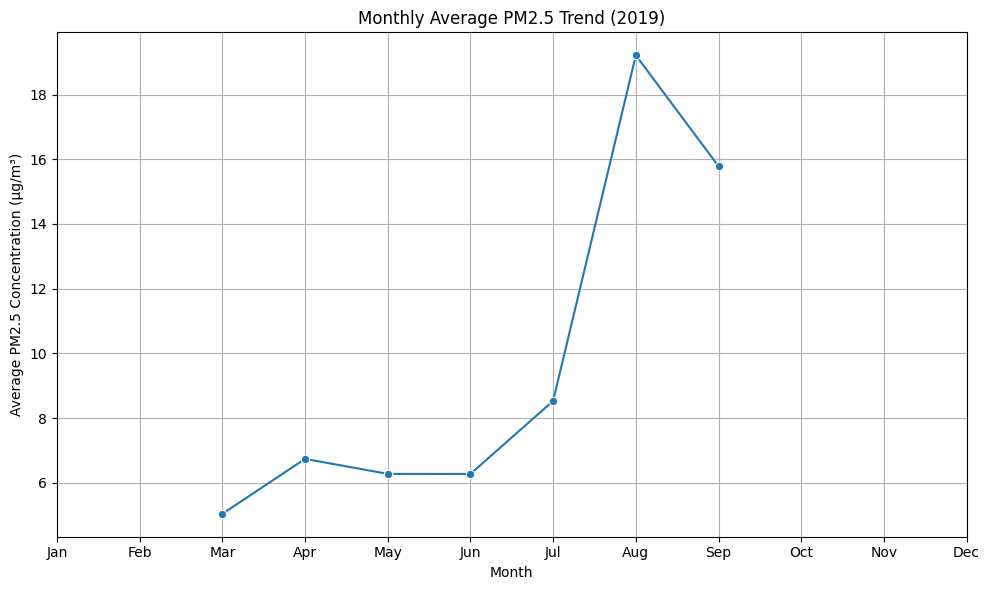

In [92]:
data_2021 = pd.read_csv('Hourly-Records-2021-01-01-to-2021-12-31.csv')

print(data_2021.head())

data_2021['MeasurementStartTime'] = pd.to_datetime(data_2021['MeasurementStartTime'])

columns_to_keep = ["MeasurementStartTime", "MeasuredValue"]
data_2021 = data_2021[columns_to_keep]

data_2021['Month'] = data_2021['MeasurementStartTime'].dt.month

monthly_pm25_2019 = data_2021.groupby('Month')['MeasuredValue'].mean().reset_index()
monthly_pm25_2019 = monthly_pm25_2019[(monthly_pm25_2019['Month'] >= 3) & (monthly_pm25_2019['Month'] <= 9)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_pm25_2019, x="Month", y="MeasuredValue", marker="o")
plt.title("Monthly Average PM2.5 Trend (2019)")
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Concentration (µg/m³)")
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid()
plt.tight_layout()
plt.show()


  County AB617Community             DataProvider                   Site  \
0   Kern        Shafter  San Joaquin Valley APCD  Golden Oak Elementary   
1   Kern        Shafter  San Joaquin Valley APCD    Grimmway Elementary   
2   Kern        Shafter  San Joaquin Valley APCD            Shafter DMV   
3   Kern        Shafter  San Joaquin Valley APCD  Golden Oak Elementary   
4   Kern        Shafter  San Joaquin Valley APCD    Grimmway Elementary   

   Latitude  Longitude  Elevation        Instrument MonitorId  ParameterId  \
0   35.4993  -119.2826        107  Met One BAM 1022  BAM 1022        88101   
1   35.4912  -119.2871        105  Met One BAM 1022  BAM 1022        88101   
2   35.5033  -119.2725        108  Met One BAM 1022  BAM 1022        88101   
3   35.4993  -119.2826        107  Met One BAM 1022  BAM 1022        88101   
4   35.4912  -119.2871        105  Met One BAM 1022  BAM 1022        88101   

   ...       Units AdjustmentDesc  LowerLimitCheck  UpperLimitCheck  \
0  ...  u

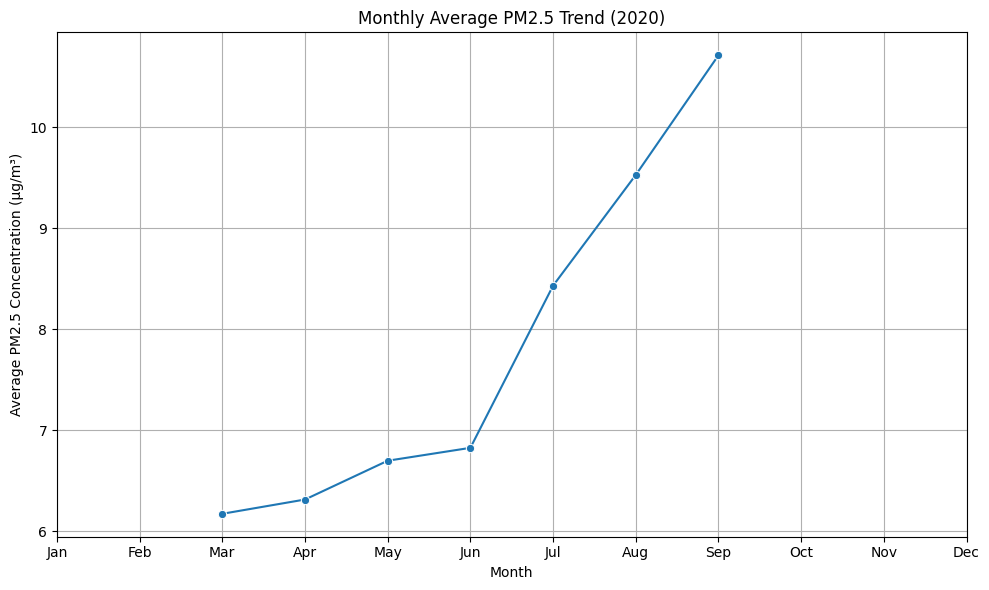

In [93]:
data_2022 = pd.read_csv('Hourly-Records-2022-01-01-to-2022-12-31.csv')

print(data_2022.head())

data_2022['MeasurementStartTime'] = pd.to_datetime(data_2022['MeasurementStartTime'])

columns_to_keep = ["MeasurementStartTime", "MeasuredValue"]
data_2022 = data_2022[columns_to_keep]

data_2022['Month'] = data_2022['MeasurementStartTime'].dt.month

monthly_pm25_2022 = data_2022.groupby('Month')['MeasuredValue'].mean().reset_index()
# only select month from March to September
monthly_pm25_2022 = monthly_pm25_2022[(monthly_pm25_2022['Month'] >= 3) & (monthly_pm25_2022['Month'] <= 9)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_pm25_2022, x="Month", y="MeasuredValue", marker="o")
plt.title("Monthly Average PM2.5 Trend (2020)")
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Concentration (µg/m³)")
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid()
plt.tight_layout()
plt.show()

In [100]:
# print the above data
print(monthly_pm25_2019)
# calculate the sum 
annual_2019=monthly_pm25_2019['MeasuredValue'].sum()
print(annual_2019)


   Month  MeasuredValue
2      3       5.042195
3      4       6.739724
4      5       6.275901
5      6       6.274295
6      7       8.531293
7      8      19.215579
8      9      15.786287
67.8652736186249


In [101]:
print(monthly_pm25_2017)
# calculate the sum
annual_2017=monthly_pm25_2017['Value'].sum()
print(annual_2017)

   Month      Value
0      4   8.415966
1      5   9.385656
2      6  13.685315
3      7  12.032832
4      8   9.765110
5      9   9.265423
62.55030223407989


In [102]:
print(monthly_pm25_2022)
# calculate the sum
annual_2020=monthly_pm25_2022['MeasuredValue'].sum()
print(annual_2020)

   Month  MeasuredValue
2      3       6.174958
3      4       6.316225
4      5       6.700091
5      6       6.827763
6      7       8.432662
7      8       9.528675
8      9      10.712849
54.69322292912491


In [104]:
print(monthly_pm25)
# calculate the sum
annual_2018=monthly_pm25['PM2.5'].sum()
print(annual_2018)

   Month      PM2.5
2      3   5.063355
3      4   5.568353
4      5   6.362969
5      6   6.750483
6      7   8.539670
7      8  20.539210
8      9  25.639518
78.46355933472053


C:\Users\olive\AppData\Local\Temp\ipykernel_29520\562789972.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=annual_data, x="Year", y="Annual PM2.5", palette="Blues_d")


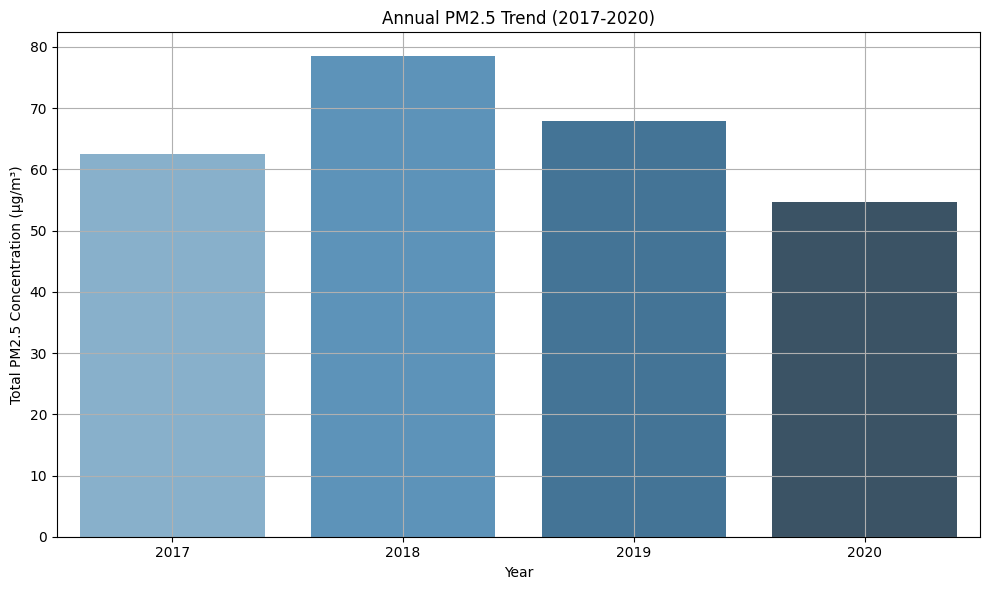

In [105]:
# plot the annual data
annual_data = pd.DataFrame({
    "Year": [2017, 2018, 2019, 2020],
    "Annual PM2.5": [annual_2017, annual_2018, annual_2019, annual_2020]
})
plt.figure(figsize=(10, 6))
sns.barplot(data=annual_data, x="Year", y="Annual PM2.5", palette="Blues_d")
plt.title("Annual PM2.5 Trend (2017-2020)")
plt.xlabel("Year")
plt.ylabel("Total PM2.5 Concentration (µg/m³)")
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\olive\AppData\Local\Temp\ipykernel_29520\3990981382.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Year', y='Percent', palette='coolwarm')


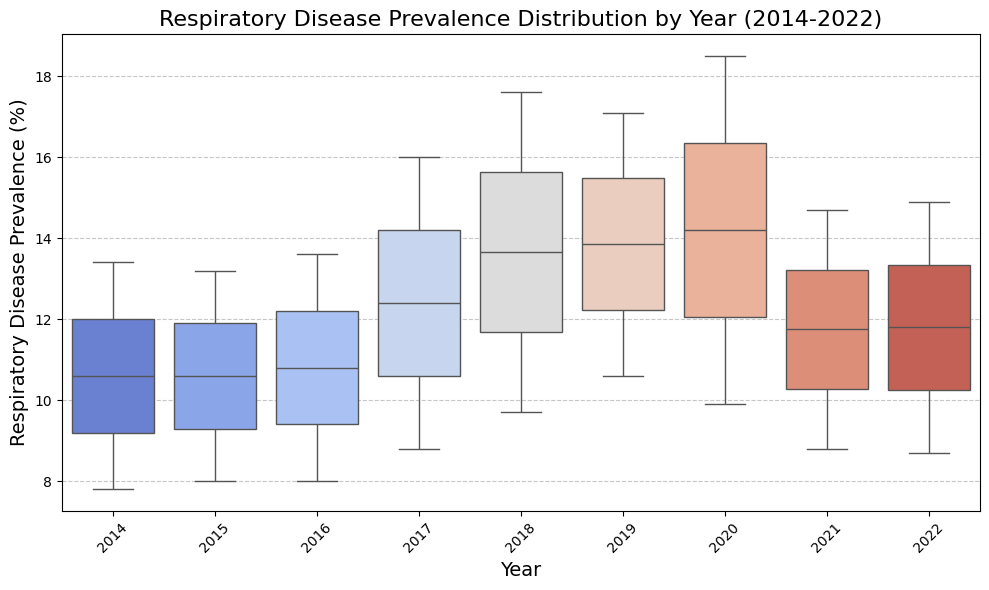

In [95]:
data = pd.read_csv('asthmaprevalence.csv')

columns_to_keep = ['Year', 'Percent']
data = data[columns_to_keep]
data = data[(data['Year'] >= 2014) & (data['Year'] <= 2022)]

data['Year'] = data['Year'].astype(int)
data['Percent'] = data['Percent'].astype(float)

data = data.sort_values(by='Year')

# Box Plot used. The data contains the 95% CI
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Year', y='Percent', palette='coolwarm')

plt.title('Respiratory Disease Prevalence Distribution by Year (2014-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Respiratory Disease Prevalence (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()